In [1]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

In [2]:
simple_bandits = [0.3, 0.4, 0.5, 0.6, 0.7] #[Komiyama, Honda, Nakagawa, 2016, arXiv 1506.00779]
classical_bandits = [0.1, 0.3, 0.5, 0.7, 0.9]
hard_bandits = [0.005, 0.01, 0.015, 0.84, 0.85]

In [3]:
class Rewarder:
    def __init__(self, probabs):
        self.probabs = probabs
        self.n = len(probabs)
    
    def get(self, i):
        if i >= self.n:
            raise IndexError
        if np.random.rand() < self.probabs[i]:
            return 1
        else:
            return 0

# Задание: реализовать и сравнить UCB и Thompson Sampling (reward, regret) на симуляциях с 3 наборами параметров (simple, classical, hard)

In [4]:
class BanditsSolver:
    def __init__(self, n, rewarder):
        self.rewarder = rewarder
        self.n = n
        self.time = 0
        self.total_reward = [0. for _ in range(n)]
        self.selections_number = [0 for _ in range(n)]

    def pull(self, times=1):
        raise NotImplementedError


In [5]:
class UCB(BanditsSolver):
    def __init__(self, n, rewarder):
        super().__init__(n, rewarder)

    def pull(self, times=1):
        selected = []
        total_reward = 0
        for t in range(times):
            chosen = -1
            ucb = 0.
            for h in range(self.n):
                h_ucb = 1e200
                if self.selections_number[h] > 0:
                    h_ucb = self.total_reward[h] / self.selections_number[h] # average reward
                    h_ucb += math.sqrt(3/2 * math.log(self.time + 1) / self.selections_number[h]) # confidence interval
                if h_ucb > ucb:
                    ucb = h_ucb
                    chosen = h
                    
            selected.append(chosen)
            self.selections_number[chosen] += 1
            reward = rewarder.get(chosen)
            self.total_reward[chosen] += reward
            total_reward += reward
            self.time += 1
        return selected, total_reward

In [6]:
class Thompson(BanditsSolver):
    def __init__(self, n, rewarder):
        super().__init__(n, rewarder)
        self.alphas = [1 for _ in range(n)]
        self.betas = [1 for _ in range(n)]

    def pull(self, times=1):
        selected = []
        total_reward = 0
        for t in range(times):
            e = [np.random.beta(self.alphas[i], self.betas[i]) for i in range(self.n)]
            chosen = np.argmax(e)

            selected.append(chosen)
            self.selections_number[chosen] += 1
            reward = rewarder.get(chosen)
            self.alphas[chosen] += reward
            self.betas[chosen] += (1 - reward)
            self.total_reward[chosen] += reward
            total_reward += reward
            self.time += 1
        return selected, total_reward

In [7]:
models = {'T': Thompson, 'U': UCB}
RUNS = 1000 # steps

def run_model(rewarder, runs, model='T'):
    model = models[model](rewarder.n, rewarder)
    selections, total_reward = model.pull(RUNS)
    return model, selections, total_reward

def draw_chosen_plot(choices, n):
    plt.hist(choices, np.arange(0, n + 1))
    plt.title('Histogram of arms selections')
    plt.xlabel('Arms')
    plt.ylabel('Number of times each arm was selected')
    plt.show()

def print_results(total_reward, rewarder, arms, selections, wins):
    print("Total number of trials", RUNS)
    print("Total number of wins", total_reward)
    print("Winning rate", total_reward / RUNS)
    print("Winning probabilities:", rewarder.probabs)
    print("Number of selections:", selections)
    print("Number of wins:", list(map(int, wins)))
    draw_chosen_plot(arms, rewarder.n)

# SIMPLE

In [8]:
rewarder = Rewarder(simple_bandits)

UCB

In [9]:
ucb, ucb_arms, ucb_total_reward = run_model(rewarder, RUNS, 'U')
ucb_selections = ucb.selections_number  # Number of times we tried each bandit
ucb_wins = ucb.total_reward  # Number of wins for each bandit

Total number of trials 1000
Total number of wins 636
Winning rate 0.636
Winning probabilities: [0.3, 0.4, 0.5, 0.6, 0.7]
Number of selections: [24, 94, 109, 284, 489]
Number of wins: [4, 48, 58, 185, 341]


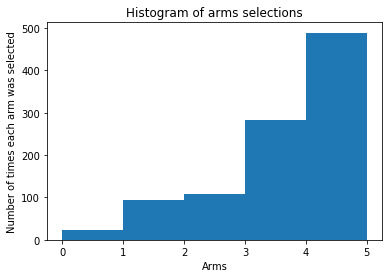

In [10]:
print_results(ucb_total_reward, rewarder, ucb_arms, ucb_selections, ucb_wins)

Thompson

In [11]:
thomp, thomp_arms, thomp_total_reward = run_model(rewarder, RUNS, 'T')
thomp_selections = thomp.selections_number  # Number of times we tried each bandit
thomp_wins = thomp.total_reward  # Number of wins for each bandit

Total number of trials 1000
Total number of wins 680
Winning rate 0.68
Winning probabilities: [0.3, 0.4, 0.5, 0.6, 0.7]
Number of selections: [13, 9, 16, 18, 944]
Number of wins: [4, 3, 5, 8, 660]


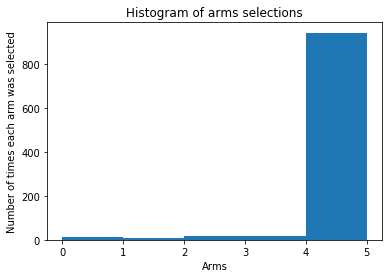

In [18]:
print_results(thomp_total_reward, rewarder, thomp_arms, thomp_selections, thomp_wins)

# CLASSICAL

In [0]:
rewarder = Rewarder(classical_bandits)

UCB

In [0]:
ucb, ucb_arms, ucb_total_reward = run_model(rewarder, RUNS, 'U')
ucb_selections = ucb.selections_number  # Number of times we tried each bandit
ucb_wins = ucb.total_reward  # Number of wins for each bandit

Total number of trials 1000
Total number of wins 856
Winning rate 0.856
Winning probabilities: [0.1, 0.3, 0.5, 0.7, 0.9]
Number of selections: [12, 20, 40, 88, 840]
Number of wins: [1, 6, 20, 60, 769]


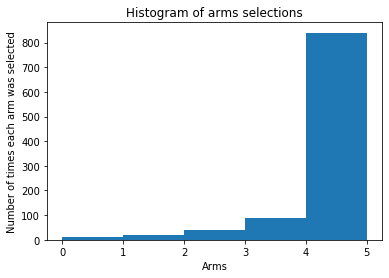

In [27]:
print_results(ucb_total_reward, rewarder, ucb_arms, ucb_selections, ucb_wins)

Thompson

In [0]:
thomp, thomp_arms, thomp_total_reward = run_model(rewarder, RUNS, 'T')
thomp_selections = thomp.selections_number  # Number of times we tried each bandit
thomp_wins = thomp.total_reward  # Number of wins for each bandit

Total number of trials 1000
Total number of wins 908
Winning rate 0.908
Winning probabilities: [0.1, 0.3, 0.5, 0.7, 0.9]
Number of selections: [3, 3, 8, 34, 952]
Number of wins: [0, 0, 5, 24, 879]


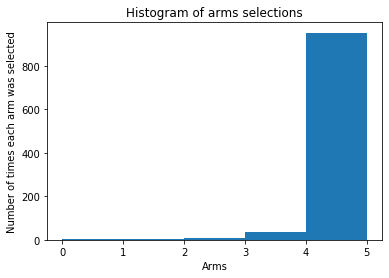

In [35]:
print_results(thomp_total_reward, rewarder, thomp_arms, thomp_selections, thomp_wins)

# HARD

In [0]:
rewarder = Rewarder(hard_bandits)

UCB

In [0]:
ucb, ucb_arms, ucb_total_reward = run_model(rewarder, RUNS, 'U')
ucb_selections = ucb.selections_number  # Number of times we tried each bandit
ucb_wins = ucb.total_reward  # Number of wins for each bandit

Total number of trials 1000
Total number of wins 819
Winning rate 0.819
Winning probabilities: [0.005, 0.01, 0.015, 0.84, 0.85]
Number of selections: [13, 11, 11, 415, 550]
Number of wins: [1, 0, 0, 348, 470]


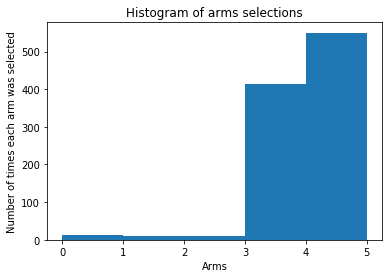

In [40]:
print_results(ucb_total_reward, rewarder, ucb_arms, ucb_selections, ucb_wins)

Thompson

In [0]:
thomp, thomp_arms, thomp_total_reward = run_model(rewarder, RUNS, 'T')
thomp_selections = thomp.selections_number  # Number of times we tried each bandit
thomp_wins = thomp.total_reward  # Number of wins for each bandit

Total number of trials 1000
Total number of wins 863
Winning rate 0.863
Winning probabilities: [0.005, 0.01, 0.015, 0.84, 0.85]
Number of selections: [3, 3, 3, 27, 964]
Number of wins: [0, 0, 0, 19, 844]


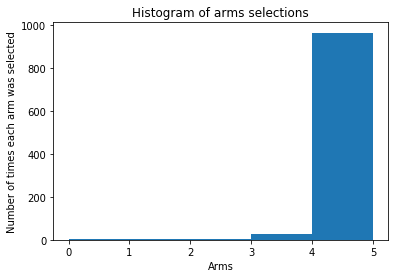

In [44]:
print_results(thomp_total_reward, rewarder, thomp_arms, thomp_selections, thomp_wins)